In [16]:
import pandas as pd
import json
import polars as pl

# Abrir e carregar o arquivo JSON
with open('processos.json', encoding='UTF-8') as f:
    data = json.load(f)

# Criar um DataFrame inicial com Polars
df = pl.DataFrame(data)

# Explodir as colunas que contêm listas
df = df.explode(["procedimentos", "falhas_gerais", "penalidade"])

# Para a coluna `profissional` (um dicionário), expandimos manualmente
df = df.with_columns([
    pl.col("profissional").struct.field("falhas").explode().alias("falhas_profissionais"),
    pl.col("profissional").struct.field("atenuantes").alias("atenuantes"),
    pl.col("profissional").struct.field("agravantes").explode().alias("agravantes"),
    pl.col("profissional").struct.field("infracoes").explode().alias("infracoes")
])

# Selecionar as colunas de interesse para análise
df = df.select([
    "numero_processo",
    pl.col("estabelecimento").struct.field("nome").alias("estabelecimento"),
    pl.col("estabelecimento").struct.field("responsavel").alias("responsavel"),
    "grande_area",
    "area_especifica",
    "procedimentos",
    "falhas_gerais",
    "falhas_profissionais",
    "atenuantes",
    "agravantes",
    "infracoes",
    "procedencia",
    "penalidade"
])

# Converter para Pandas (se necessário para compatibilidade futura)
df_pandas = df.to_pandas()

# Filtrar os registros cuja procedência não seja "Improcedente"
df_filtrado = df_pandas[df_pandas["procedencia"] != "Improcedente"]

# Exibir os primeiros registros do DataFrame filtrado
print(df_filtrado.head())


ModuleNotFoundError: No module named 'polars'

In [ ]:
# import pandas as pd
# import json
# import seaborn as sns

# # Abrir e carregar o arquivo JSON
# with open('processos.json', encoding='UTF-8') as f:
#     data = json.load(f)

# # Construir a estrutura tabular com iteração
# data_tabular = [
#     {
#         "numero_processo": dicionario['numero_processo'],
        
#         "estabelecimento": dicionario['estabelecimento']['nome'],
#         "responsavel": dicionario['estabelecimento']['responsavel'],
#         "grande_area": dicionario['grande_area'],
#         "area_especifica": dicionario['area_especifica'],
#         "procedimentos": procedimentos,
#         'falhas_gerais': falha_geral,
#         'falhas_profissionais': falha_profissional,
#         'atenuantes': atenuante,
#         'agravantes': agravante,
#         'infracoes': infracao,
#         'procedencia': dicionario['procedencia'],
#         'penalidade': penalidade
#     }
#     for dicionario in data
#     for procedimentos in dicionario.get('procedimentos', [])
#     for falha_geral in dicionario.get('falhas_gerais', [])
#     for falha_profissional in dicionario.get('profissional', {}).get('falhas', [])
#     for atenuante in [dicionario.get('profissional', {}).get('atenuantes', '')]
#     for agravante in (
#         dicionario.get('profissional', {}).get('agravantes', [])
#         if isinstance(dicionario.get('profissional', {}).get('agravantes'), list)
#         else [dicionario.get('profissional', {}).get('agravantes', '')]
#     )
#     for infracao in dicionario.get('profissional', {}).get('infracoes', [])
#     for penalidade in (
#         dicionario.get('penalidade', [])
#         if isinstance(dicionario.get('penalidade'), list)
#         else [dicionario.get('penalidade', '')]
#     )
# ]
# # Criar o DataFrame
# df = pd.DataFrame(data_tabular)


# # Contagem de processos
# contagem = df['numero_processo'].value_counts()
# contagem

# # Resetar o índice (opcional)
# df.reset_index(drop=True, inplace=True)

# # Filtrando improcedentes

# dfp = df[df['procedencia'] != 'Improcedente']

# # Exibir os primeiros registros do DataFrame e a contagem
# dfp.head()


,numero_processo,estabelecimento,responsavel,grande_area,area_especifica,procedimentos,falhas_gerais,falhas_profissionais,atenuantes,agravantes,infracoes,procedencia,penalidade
0,40/2022,Vet Medic Clínica Veterinária Ltda,Isabela Christine Cruz Mendes,Medicina Veterinária,Cirurgia de Pequenos Animais,Castração,Negligência e imprudência,Falta de informações sobre os riscos do proced...,Ausência de punição disciplinar anterior,,Art. 1º. Exercer a profissão com o máximo de z...,procedente,Advertência confidencial
1,40/2022,Vet Medic Clínica Veterinária Ltda,Isabela Christine Cruz Mendes,Medicina Veterinária,Cirurgia de Pequenos Animais,Castração,Negligência e imprudência,Falta de informações sobre os riscos do proced...,Ausência de punição disciplinar anterior,,Art. 1º. Exercer a profissão com o máximo de z...,procedente,"Multa de R$ 900,00"
2,40/2022,Vet Medic Clínica Veterinária Ltda,Isabela Christine Cruz Mendes,Medicina Veterinária,Cirurgia de Pequenos Animais,Castração,Negligência e imprudência,Falta de informações sobre os riscos do proced...,Ausência de punição disciplinar anterior,,Art. 3º. Empenhar-se para melhorar as condiçõe...,procedente,Advertência confidencial
3,40/2022,Vet Medic Clínica Veterinária Ltda,Isabela Christine Cruz Mendes,Medicina Veterinária,Cirurgia de Pequenos Animais,Castração,Negligência e imprudência,Falta de informações sobre os riscos do proced...,Ausência de punição disciplinar anterior,,Art. 3º. Empenhar-se para melhorar as condiçõe...,procedente,"Multa de R$ 900,00"
4,40/2022,Vet Medic Clínica Veterinária Ltda,Isabela Christine Cruz Mendes,Medicina Veterinária,Cirurgia de Pequenos Animais,Castração,Negligência e imprudência,Falta de informações sobre os riscos do proced...,Ausência de punição disciplinar anterior,,Art. 6º. São deveres do médico veterinário: X ...,procedente,Advertência confidencial


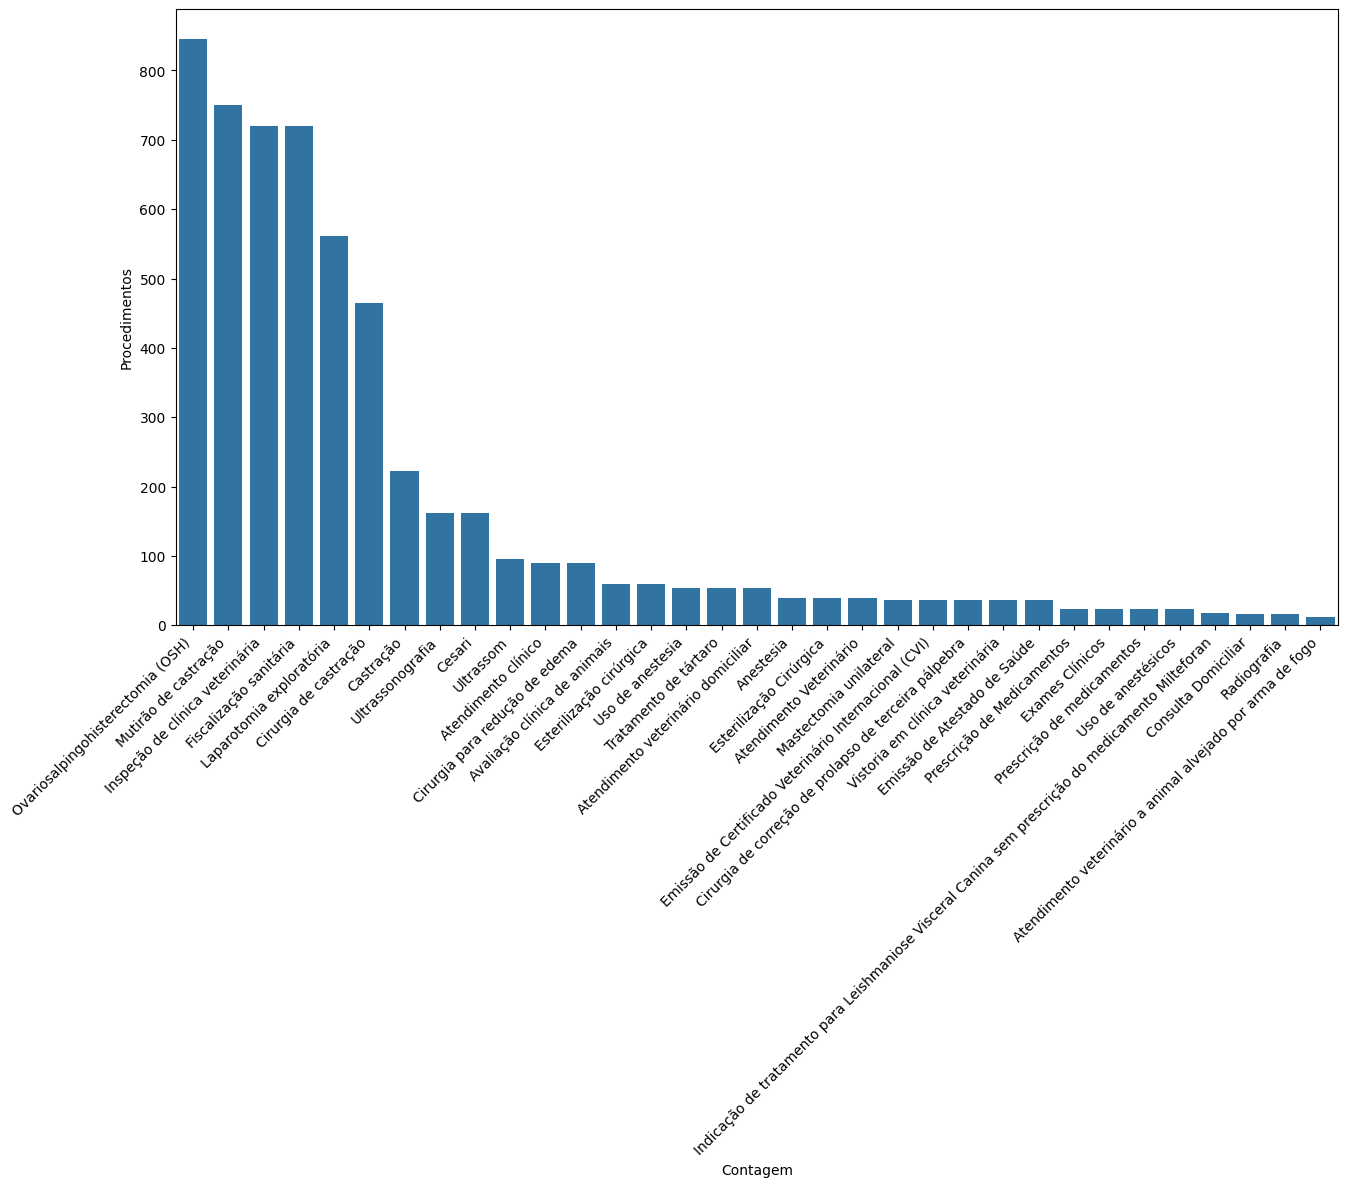

,procedimentos,contagem
0,Ovariosalpingohisterectomia (OSH),846
1,Mutirão de castração,750
2,Inspeção de clínica veterinária,720
3,Fiscalização sanitária,720
4,Laparotomia exploratória,561
5,Cirurgia de castração,465
6,Castração,222
7,Ultrassonografia,162
8,Cesari,162
9,Ultrassom,96


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar a frequência dos valores de 'procedimentos' nesses números de processo únicos
freq_procedimentos = pd.DataFrame(dfp['procedimentos'].value_counts()).reset_index()

# Renomear as colunas para ficar mais claro
freq_procedimentos.columns = ['procedimentos', 'contagem']

plt.figure(figsize=(15, 8))
grafico = sns.barplot(data=freq_procedimentos, x='procedimentos', y='contagem')
plt.xticks(rotation=45, ha='right')
#plt.title("Frequência dos Procedimentos")
plt.xlabel("Contagem")
plt.ylabel("Procedimentos")
plt.show()

freq_procedimentos

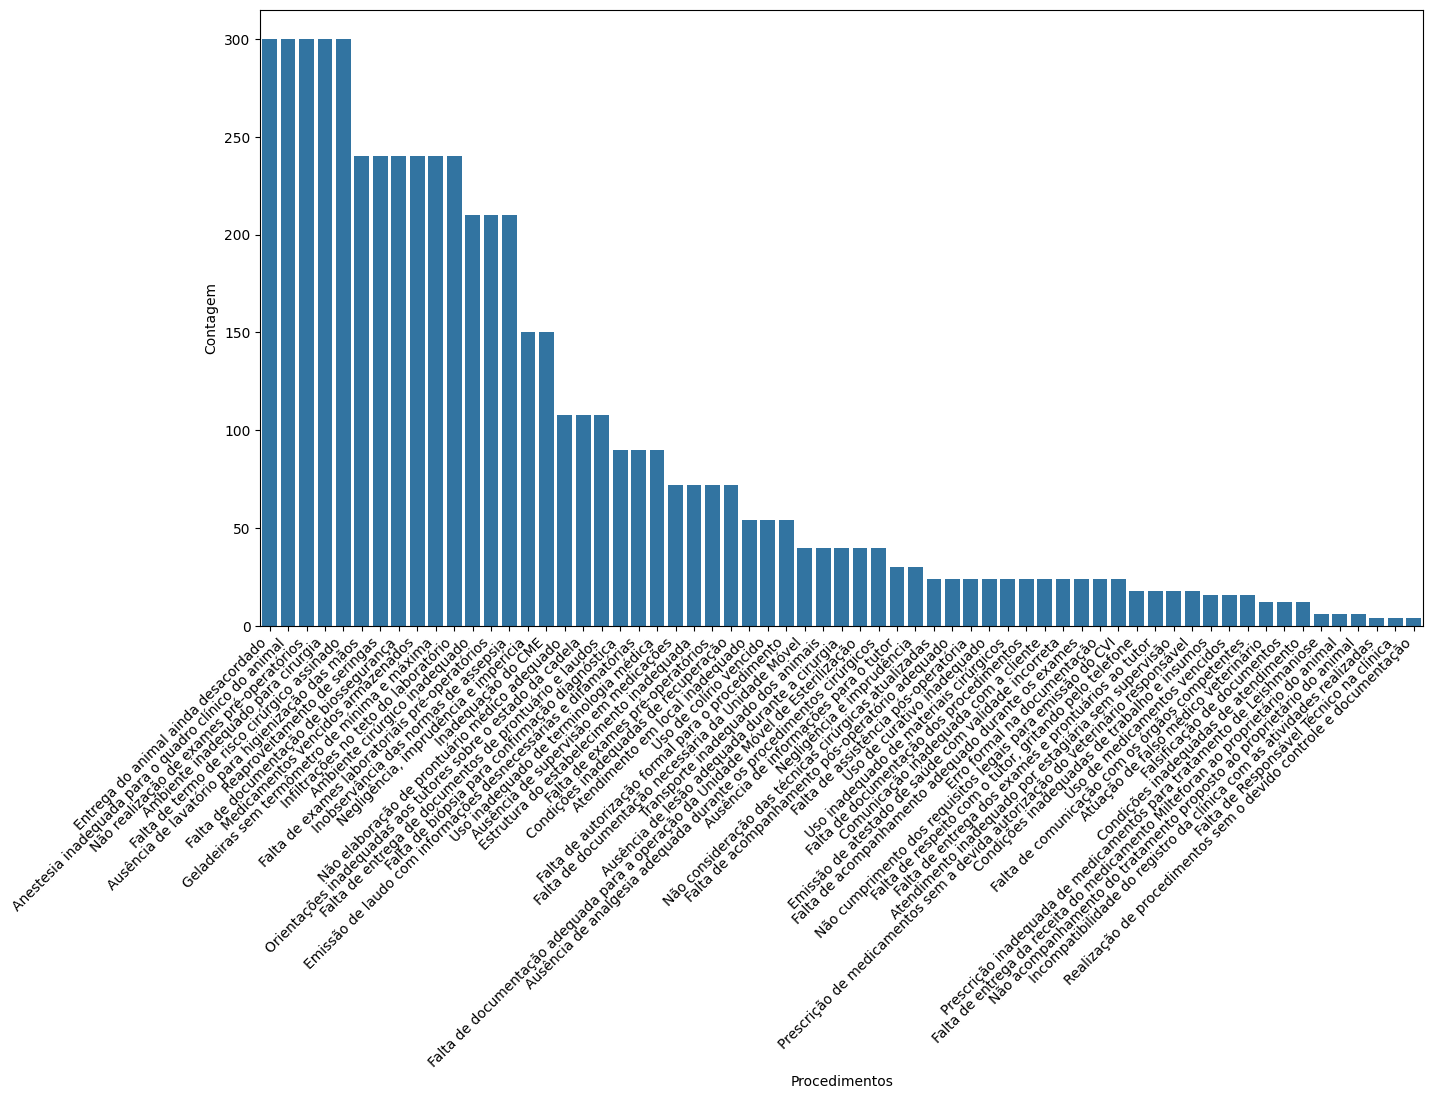

,falhas_gerais,contagem
0,Entrega do animal ainda desacordado,300
1,Anestesia inadequada para o quadro clínico do ...,300
2,Não realização de exames pré-operatórios,300
3,Ambiente inadequado para cirurgia,300
4,Falta de termo de risco cirúrgico assinado,300
...,...,...
58,Falta de entrega da receita do medicamento Mil...,6
59,Não acompanhamento do tratamento proposto ao p...,6
60,Incompatibilidade do registro da clínica com a...,4
61,Falta de Responsável Técnico na clínica,4


In [10]:
# Contar a frequência dos valores de 'falhas_gerais' para os processos únicos
freq_falhas = pd.DataFrame(dfp['falhas_gerais'].value_counts()).reset_index()

# Renomear as colunas para 'falhas_gerais' e 'contagem'
freq_falhas.columns = ['falhas_gerais', 'contagem']

plt.figure(figsize=(15, 8))
grafico = sns.barplot(data=freq_falhas, x='falhas_gerais', y='contagem')
plt.xticks(rotation=45, ha='right')
#plt.title("Frequência dos Procedimentos")
plt.xlabel("Procedimentos")
plt.ylabel("Contagem")
plt.show()

# Exibir o DataFrame resultante
freq_falhas

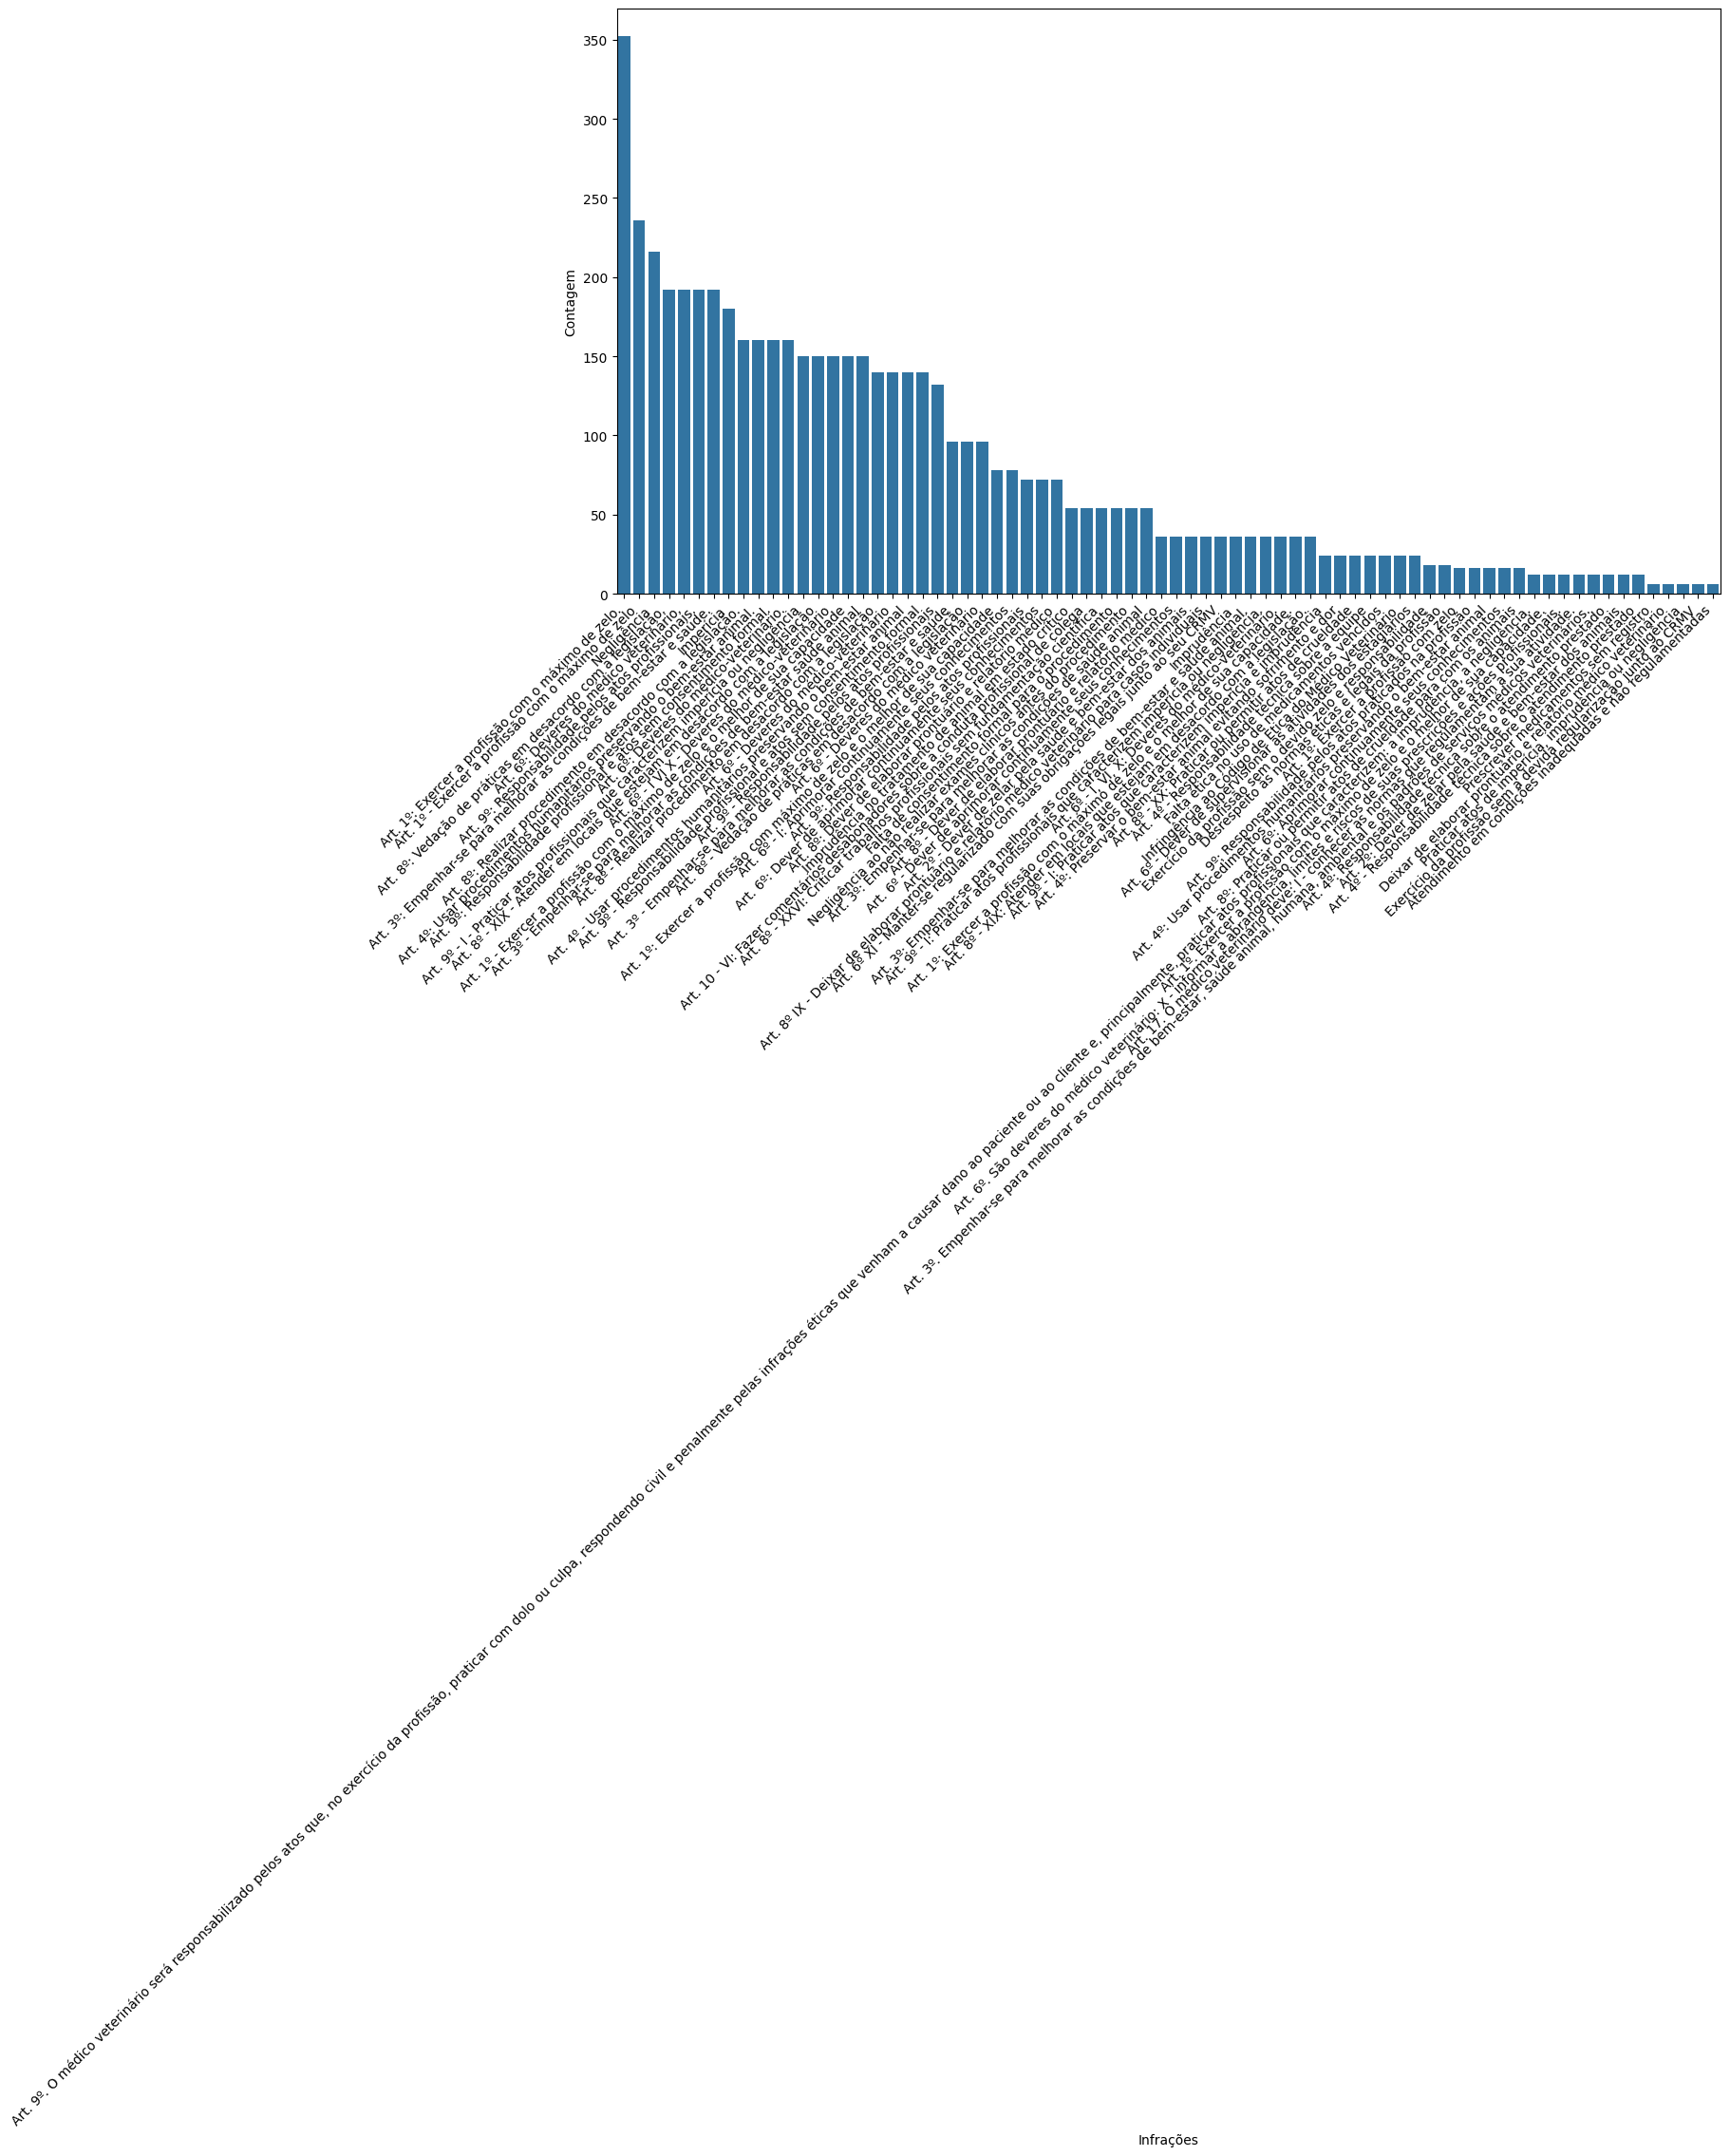

,infracoes,contagem
0,Art. 1º: Exercer a profissão com o máximo de z...,352
1,Art. 1º - Exercer a profissão com o máximo de ...,236
2,Negligência,216
3,Art. 8º: Vedação de práticas em desacordo com ...,192
4,Art. 6º: Deveres do médico veterinário.,192
...,...,...
69,Prescrever medicamentos sem registro,6
70,Deixar de elaborar prontuário e relatório médi...,6
71,"Praticar atos de imperícia, imprudência ou neg...",6
72,Exercício da profissão sem a devida regulariza...,6


In [11]:
freq_infracoes = pd.DataFrame(dfp['infracoes'].value_counts()).reset_index()
freq_infracoes.columns = ['infracoes', 'contagem']

plt.figure(figsize=(15, 8))
grafico = sns.barplot(data=freq_infracoes, x='infracoes', y='contagem')
plt.xticks(rotation=45, ha='right')
#plt.title("Infrações")
plt.xlabel("Infrações")
plt.ylabel("Contagem")
plt.show()
freq_infracoes

In [124]:
freq = pd.DataFrame(dfp['numero_processo'].value_counts()).reset_index()
freq.columns = ['Número do processo', 'contagem']
freq

,Número do processo,contagem
0,28/2021,1500
1,25/2021,1440
2,23/2020,930
3,29/2021,324
4,30/2022,288
5,51/2022,270
6,08/2019,200
7,18/2020,162
8,18/2019,144
9,62/2020,126


In [12]:
freq = pd.DataFrame(dfp['area_especifica'].value_counts()).reset_index()
freq.columns = ['Área específica', 'contagem']
freq


,Área específica,contagem
0,Cirurgia Veterinária Ética Veterinária,1788
1,Vigilância Sanitária Ética Veterinária,1440
2,Cirurgia Veterinária,930
3,Ética Profissional,348
4,Obstetrícia Veterinária Ética Veterinária,324
5,Clínica Veterinária Cirurgia Veterinária,270
6,Cirurgia Veterinária Bem-estar Animal,120
7,Cirurgia Veterinária Bem-Estar Animal,80
8,Ética Veterinária,72
9,Oftalmologia Veterinária Cirurgia Veterinária,72
